## Iris Flower Classification

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Understanding the Dataset

In [2]:
data1=pd.read_csv("Iris.csv")
data1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df=data1.copy(deep=True)

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.shape

(150, 6)

In [9]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Data Cleaning 

In [11]:
df.isnull().sum()              

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# There are no null values

In [13]:
df.duplicated().sum()

0

In [14]:
# There are no duplicate values

In [15]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [16]:
df.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [17]:
numerical=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
categorical=["Species"]

# Numerical and categorical columns are separated and made it into separate list.

### Outlier Detection and Removal 

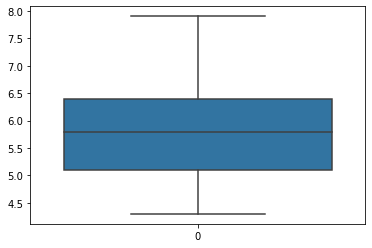

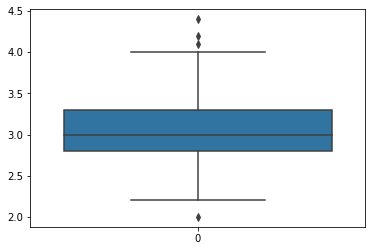

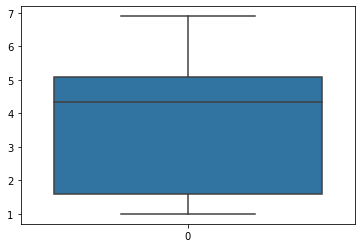

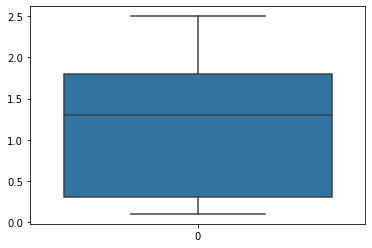

In [18]:
for i in numerical:
    sns.boxplot(data=df[i])
    plt.show()

In [19]:
for i in numerical:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    up=Q3+1.5*IQR
    
    
    for j in df[i]:
        if j<low:
            df=df.replace(j,low)
        if j>up:
            df=df.replace(j,up)

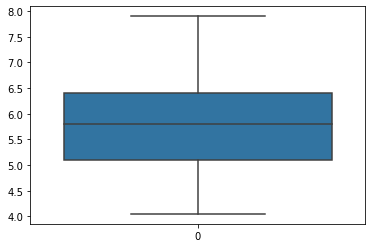

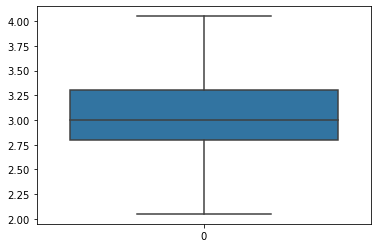

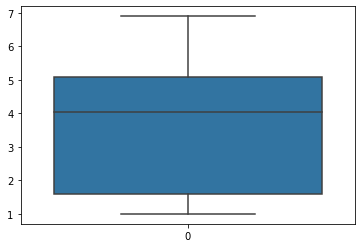

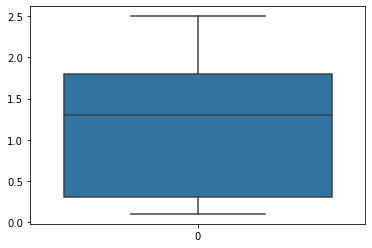

In [20]:
for i in numerical:
    sns.boxplot(data=df[i])
    plt.show()

### Data Visualization 

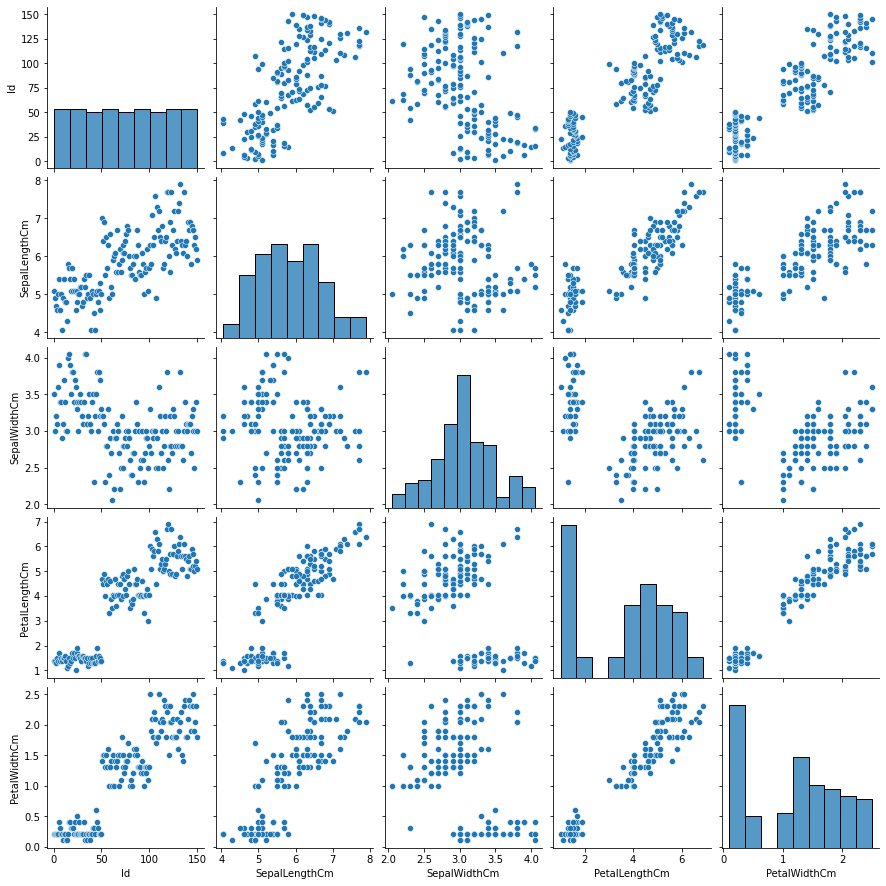

In [21]:
sns.pairplot(data=df)
plt.show()

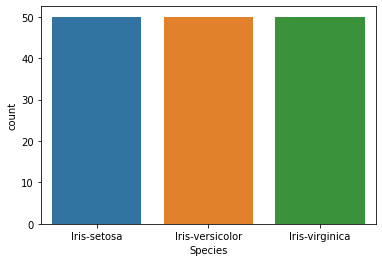

In [22]:
sns.countplot(data=df,x="Species")
plt.show()

In [23]:
# There is no class imbalance.

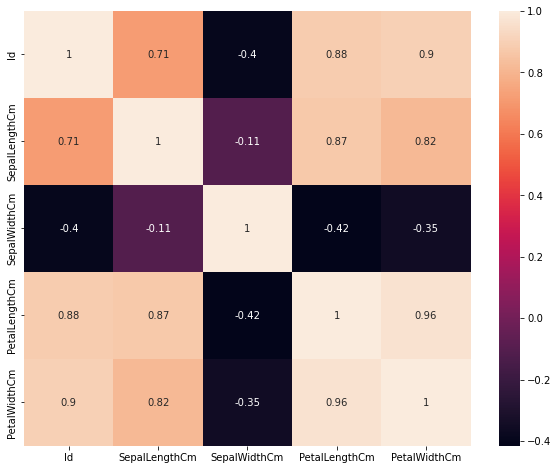

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [27]:
# Correlation between each attributes is obtained using heatmap.

# Sepal length and Petal length are highly correlated to each other; when the Sepal length increases, Petal length also increases and vice-versa.

# Similarly, Sepal length and Petal width & Petal length and Petal width are also positively correlated .
 
# The negatively correlated are:
    # Sepal Length and Sepal width
    # Sepal width and Petal width 
    # Sepal width and Petal length
    # ie., when one value increases the other decreases and vice-versa.


###  Encoding the target column

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lb=LabelEncoder()

In [30]:
df["Species"]=lb.fit_transform(df["Species"])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.00,5.1,3.5,1.4,0.20,0
1,2.05,4.9,3.0,1.4,0.20,0
2,3.00,4.7,3.2,1.3,0.20,0
3,4.00,4.6,3.1,1.5,0.20,0
4,5.00,5.0,3.6,1.4,0.20,0
...,...,...,...,...,...,...
145,146.00,6.7,3.0,5.2,2.30,2
146,147.00,6.3,2.5,5.0,1.90,2
147,148.00,6.5,3.0,5.2,2.05,2
148,149.00,6.2,3.4,5.4,2.30,2


In [31]:
# We encoded the target column i.e 'Species'

### Model building 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=df.drop(["Species"],axis=1)
y=df["Species"]

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [35]:
X_train.shape, Y_train.shape

((120, 5), (120,))

In [36]:
X_test.shape,Y_test.shape

((30, 5), (30,))

### Fitting the Model 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression(solver='liblinear')

In [39]:
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [40]:
y_pred=model.predict(X_test)

### Calculating model's performance 

In [41]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [42]:
print("Accuracy=", accuracy_score(Y_test,y_pred))

Accuracy= 0.9333333333333333


In [43]:
# The model that we used is logistic regression.
# The accuracy for the model is 93.33%

In [44]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [45]:
print(confusion_matrix(Y_test,y_pred))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


In [46]:
# Precision,Recall,f1-score and support of the target column is obtained using classification report

### Saving the model 

In [47]:
import pickle
saved_model=pickle.dumps(model)
model_from_pickle=pickle.loads(saved_model)
model_from_pickle.predict(X_test)

array([2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [48]:
# Firstly we will be using the dump() function to save the model using pickle.Then we will be loading that saved model.lastly, after loading that model we will use this to make predictions.

### Prediction on Unknown Data 

In [49]:
print(model.predict([[3.6,1.6,2.4,0.7,0.9]]))

[0]
